In [3]:
import numpy as np
from scipy.sparse import bsr_matrix
from scipy.sparse.linalg import eigsh
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Задание 5 
# Решение граничной задачи для двумерного уравнения Шредингера описывающего состояния частицы в бесконечно глубокой потенциальной яме
## Параметры сетки
В рассчете используется квадратная сетка с $N=N_x=N_y=100$ узлами на диапазоне $[-L/2, L/2]$, где $L=L_x=L_y=1$. 

In [4]:
N = 100
L = 1
h = L/(N+1)
xnet = [-L/2 + h*(j+1) for j in range(N)]
ynet = [-L/2 + h*(j+1) for j in range(N)]
xynet = [(x,y) for y in ynet for x in xnet]

## Гамильтониан
В данной задаче формирутся дискретный гамильтониан размера $N^2=10000$ для сетки вида $(x_1y_1, x_2y_1, x_3y_1, ..., x_Ny_1, x_1y_2, x_2y_2, ..., x_Ny_N)$. Гамильтониан задается в блочно-трехдиаганальном виде.

In [5]:
H = np.diag([4/h**2 for j in range(N**2)])
for j in range(N**2):
    if j<N**2-N:
        H[j, j+N] = -1/h**2
    if j<N**2-1 and (j+1)%N>0:
        H[j, j+1] = -1/h**2
H_sparse = bsr_matrix(H + H.T, blocksize=(N,N))
# H_sparse.data

## Рассчет и визуализация первых 9 волновых функций
Здесь рассчитываются волновые функции для первых 10 наименьших значений спектра. Затем эти функции визуализируются. Также подписаны значения энергии $\hat{E_n}$ которые связаны с полученными значениями спектра $E_n$ по формуле:

$\hat{E_n} = E_n/\pi^2 - (E_1/\pi^2 - 2)$

Учитывая что ширина ямы $L=1$ то полученные значения $\hat{E_n}$ для того чтобы совпадать с теорией должны быть представимы в виде $\hat{E_n} = n_x^2 + n_y^2, n_x,n_y=1,2,..$. Рассчет дал похожие значения, например $\hat{E_2}=\hat{E_3}=4.88\approx2^2+1^2$

In [6]:
vals, vecs = eigsh(H_sparse, k=10, which='SA')

/home/nikolai/PycharmProjects/venvs/dataSci/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


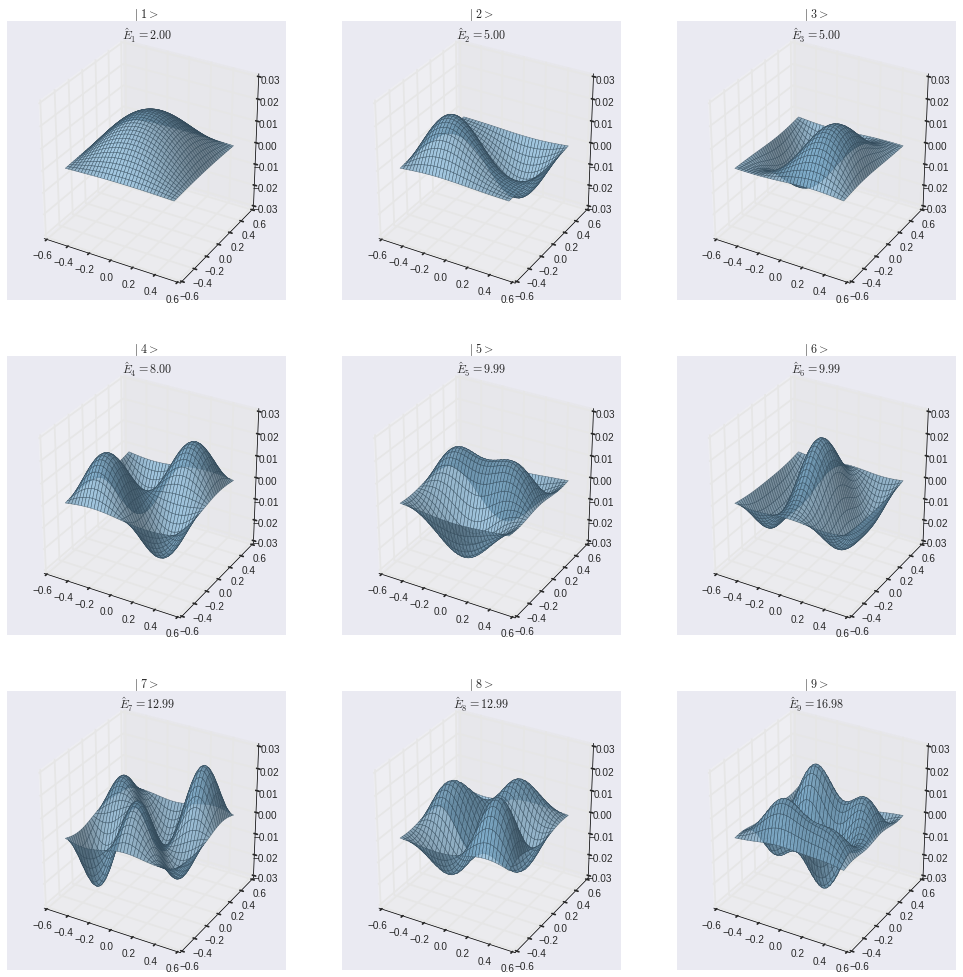

In [10]:
cm=sns.color_palette("Blues_d")
X, Y = np.meshgrid(xnet, ynet)
fig = plt.figure(figsize=(17,17))
for k in range(9):
    ax = fig.add_subplot(3, 3, k+1, projection='3d')
    Z = np.array([[vecs[:,k][j+N*i] for j in range(N)] for i in range(N)])
    ax.plot_surface(X, Y, Z, rstride=3, cstride=3, alpha=0.75, color=cm[-1], linewidth=0.5, edgecolors=cm[0])
    ax.set_zlim3d([-0.03, 0.03])
    ax.set_title('$|\ %d>$\n$\hat{E}_%d=%.2f$'%(k+1, k+1, vals[k]/(np.pi**2)-(vals[0]/(np.pi**2)-2)))
plt.show()